In [1]:
! pip install mlxtend
! pip install lightgbm
! pip install missingno

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno

import os
print(os.listdir("../DS_project"))

import warnings
warnings.filterwarnings('ignore')



['.ipynb_checkpoints', 'datasets', 'notebook.ipynb']


In [12]:
#Importer le données d'entrainement
df_train = pd.read_csv("../DS_project/datasets/train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# Importer les données du test
df_test = pd.read_csv("../DS_project/datasets/test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
print (f"Les données d'entrainement contiennent {df_train.shape[0]} lignes et {df_train.shape[1]} colonnes")
print (f"Les données du test contiennent {df_test.shape[0]} lignes et {df_test.shape[1]} colonnes")

Les données d'entrainement contiennent 1460 lignes et 81 colonnes
Les données du test contiennent 1459 lignes et 80 colonnes


In [15]:
# description des données numériques 
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [16]:
#Informations sur les champs 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Traitement des valeurs manquantes (Données d'entrainement)

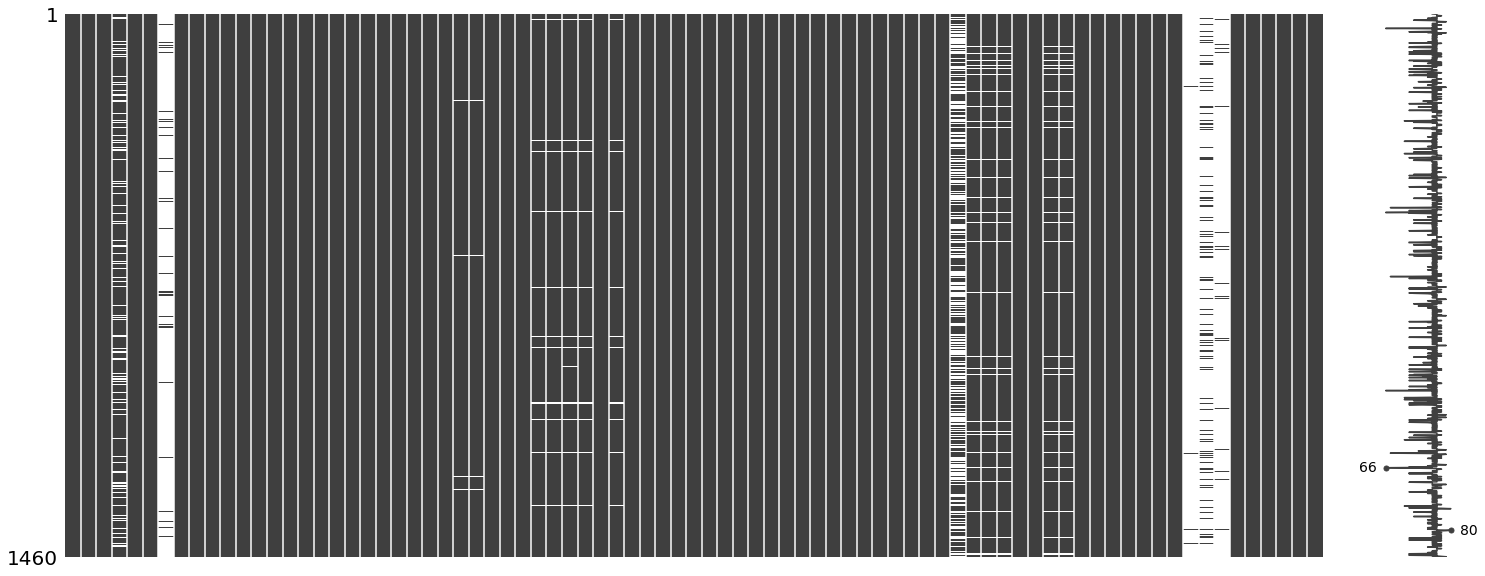

In [22]:
msno.matrix(df_train);

In [23]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(df_train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


### Traitement des valeurs manquantes (Données du test)

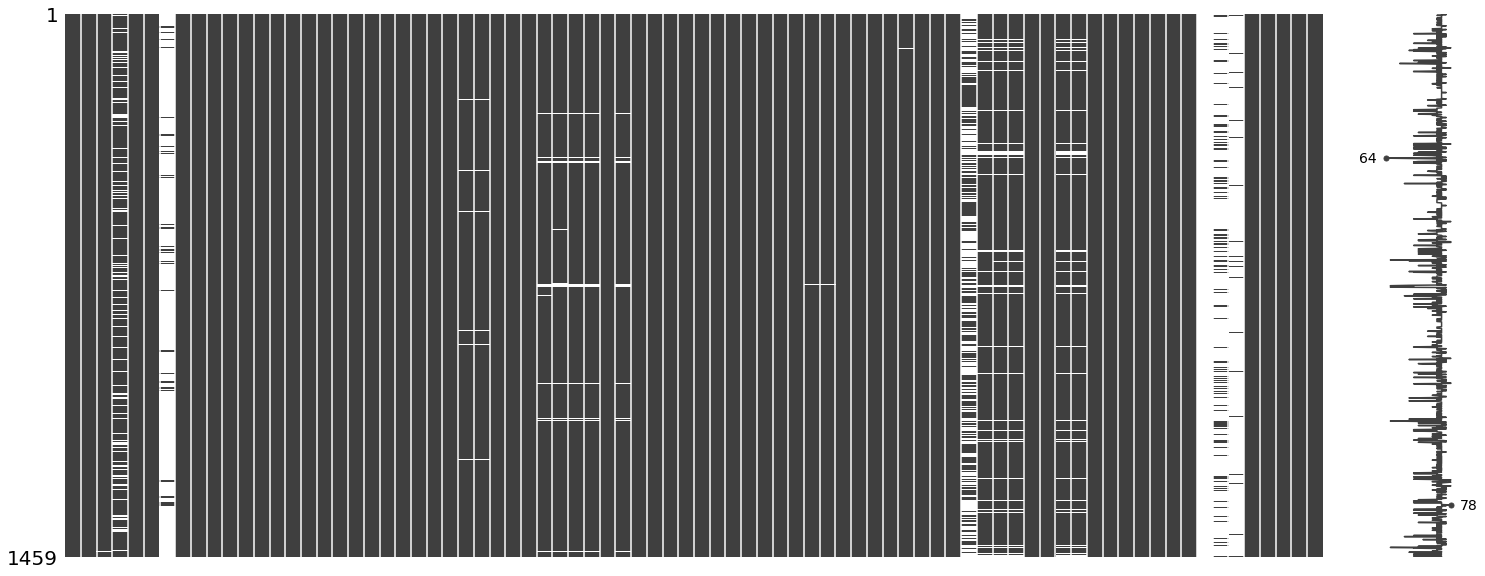

In [24]:
msno.matrix(df_test);

In [25]:
missing_percentage(df_test)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageYrBlt,78,5.35
GarageQual,78,5.35
GarageFinish,78,5.35
GarageCond,78,5.35


# Vérification de la normalization de l'output "SalePrice" pour appliquer la régression linéaire multiple.


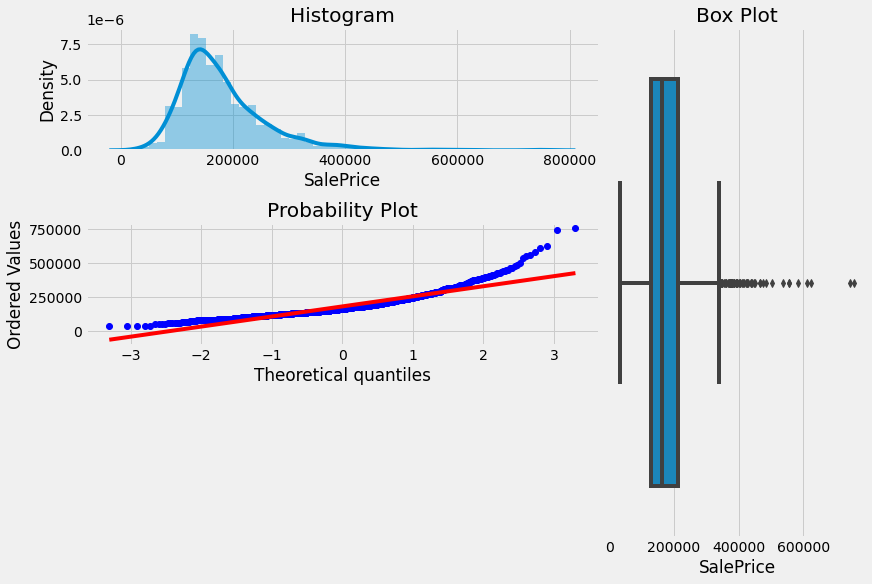

In [26]:
def plotting_3_chart(df, feature):

    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

     
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram') 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(df_train, 'SalePrice')

D'après ces figures, on remarque que :
* La variable cible SalePrice n'est pas normalement distribué.
* La variable cible asymétrique à droite. 
* Plusieurs valeurs aberrantes.

In [28]:
#Symétrie et Aplatissement
print("Symétrie: " + str(df_train['SalePrice'].skew()))
print("Aplatissement: " + str(df_train['SalePrice'].kurt()))

Symétrie: 1.8828757597682129
Aplatissement: 6.536281860064529


In [29]:
## Obtenir la corrélation de touts les champs avec la variable cible.
(df_train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

La variable la plus corrélée est **OverallQual**

### SalePrice vs OverallQual

In [33]:
def customized_scatterplot(y, x):
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    sns.scatterplot(y = y, x = x);

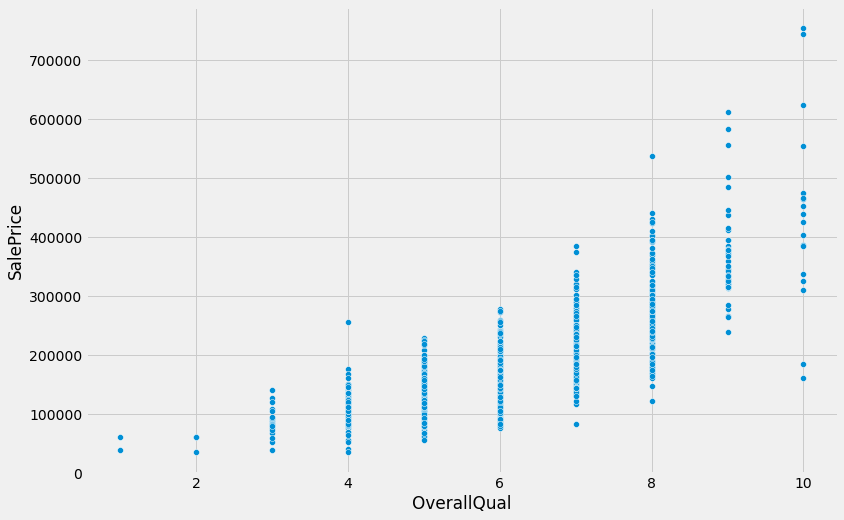

In [32]:
customized_scatterplot(df_train.SalePrice, df_train.OverallQual)

**OverallQual** est une variable catégorielle, et un nuage de points n'est pas le meilleur moyen de visualiser les variables catégorielles. Cependant, il existe une relation apparente entre les deux caractéristiques. Le prix des maisons augmente avec la qualité globale. On va voir quelques autres fonctionnalités pour déterminer les valeurs aberrantes. On va se concentrer maintenant sur les variables numériques.

### SalePrice vs GrLivArea

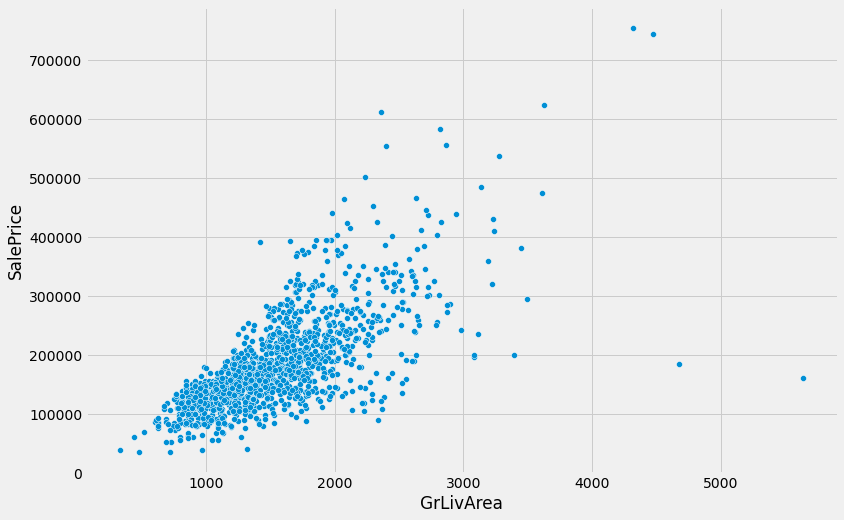

In [34]:
customized_scatterplot(df_train.SalePrice, df_train.GrLivArea)

Il y a deux valeurs aberrantes dans le graphique ci-dessus. On doit les éliminer. Maintenet , on va voir un autre nuage de points avec une caractéristique différente.

### SalePrice vs GarageArea

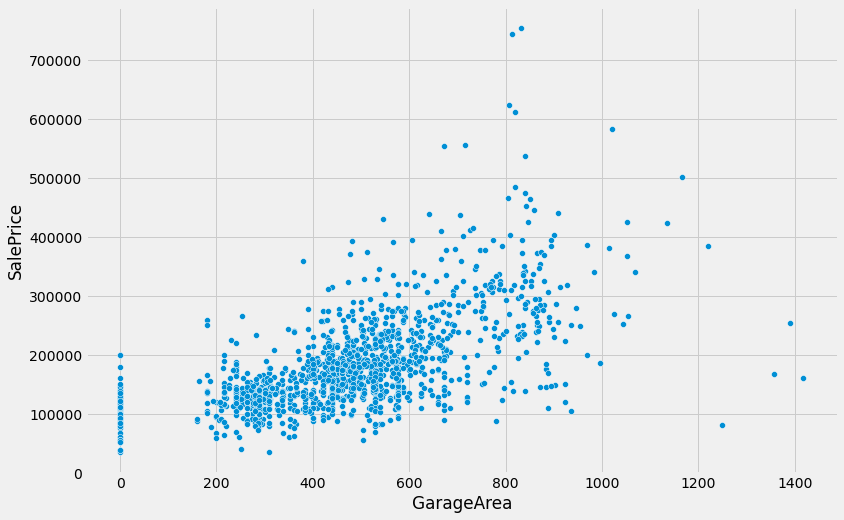

In [35]:
customized_scatterplot(df_train.SalePrice, df_train.GarageArea);


### SalePrice vs TotalBsmtSF

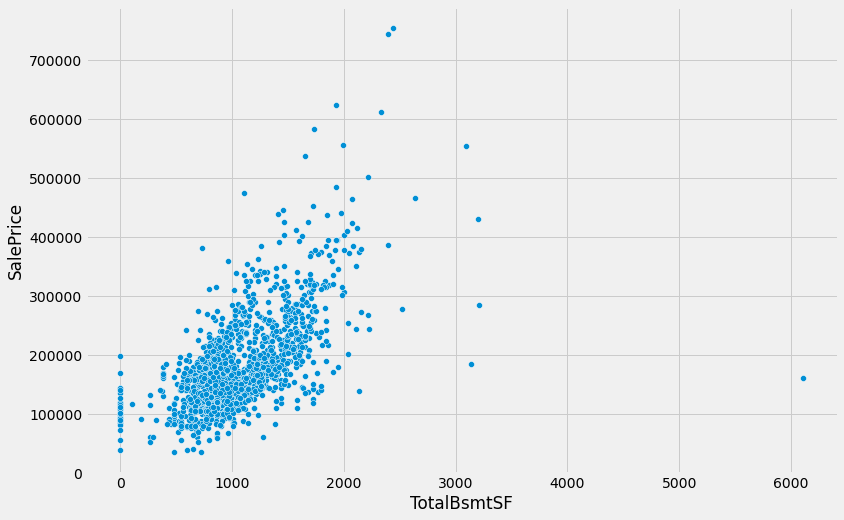

In [36]:
customized_scatterplot(df_train.SalePrice, df_train.TotalBsmtSF)


### SalePrice vs 1stFlrSF

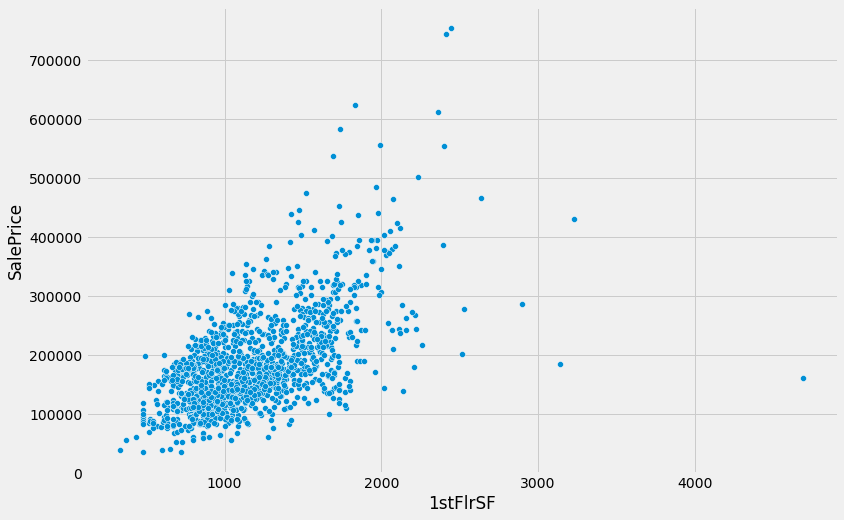

In [37]:
customized_scatterplot(df_train.SalePrice, df_train['1stFlrSF']);

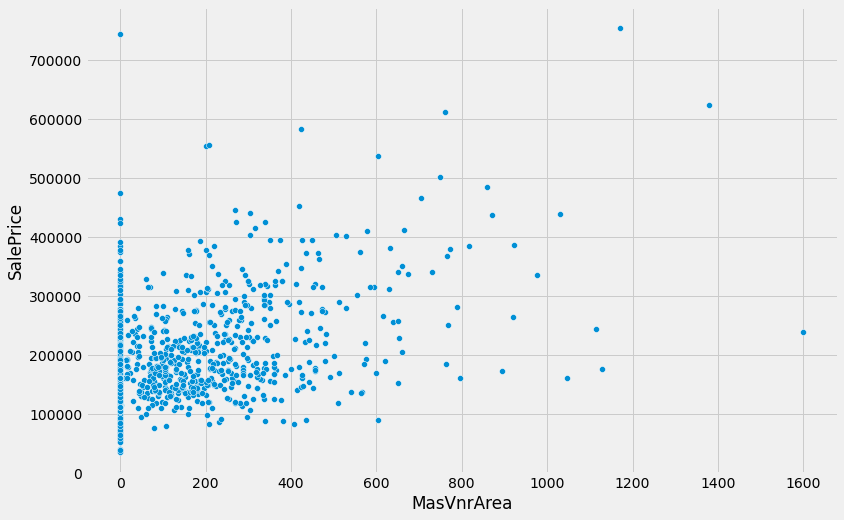

In [38]:
customized_scatterplot(df_train.SalePrice, df_train.MasVnrArea);

# Observations:
* La variable cible montre un niveau de variance inégal entre la plupart des variables prédictives (indépendantes). C'est la Hétéroscédasticité. Ceci ce contradisent avec une hypothèse de la régression linéaire multiple.

* Les deux en haut à droite de **SalePrice Vs GrLivArea** semblent suivre une direction, qui peut s'expliquer en disant qu'au fur et à mesure que les prix augmentaient, la zone faisait de même.
* Cependant, les deux en bas à droite du même graphique ne suivent aucune direction. Par conséquent ,on va les éliminer.

In [40]:

## Suppression de ces deux valeurs avec des valeurs aberrantes.
df_train = df_train[df_train.GrLivArea < 4500]
df_train.reset_index(drop = True, inplace = True)

df_train2 = df_train.copy()

Choix de l'algorithme :

## Hypothèses de la régression

* Linéarité (Forme fonctionnelle correcte)
*  Homoscédasticité (variance d'erreur constante) ( vs hétéroscédasticité ). 
* Indépendance des erreurs ( vs Autocorrélation ) 
* Normalité multivariée (normalité des erreurs) 
* Pas ou peu de Multicolinéarité. 

Linéarité (forme fonctionnelle correcte) :
La régression linéaire nécessite que la relation entre chaque variable indépendante et la variable dépendante soit linéaire. L'hypothèse de linéarité peut être testée avec des nuages de points.
Les deux exemples suivants illustrent deux cas où aucune ou peu de linéarité n'est présente.

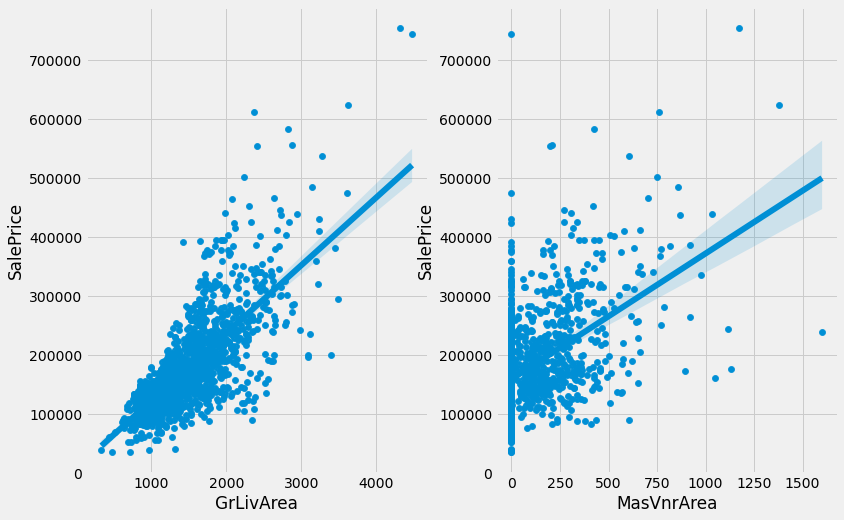

In [44]:
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
sns.scatterplot( x = df_train.GrLivArea, y = df_train.SalePrice,  ax=ax1)
sns.regplot(x=df_train.GrLivArea, y=df_train.SalePrice, ax=ax1)
sns.scatterplot(x = df_train.MasVnrArea,y = df_train.SalePrice, ax=ax2)
sns.regplot(x=df_train.MasVnrArea, y=df_train.SalePrice, ax=ax2);

Il existe une meilleure relation linéaire entre **SalePrice** et **GrLivArea** que **SalePrice** et **MasVnrArea**.
En outre, il y a quelques valeurs aberrantes dans l'ensemble de données. Dans ce cas, nous devrons peut-être modifier notre fonction en fonction des données pour obtenir le meilleur ajustement possible. 

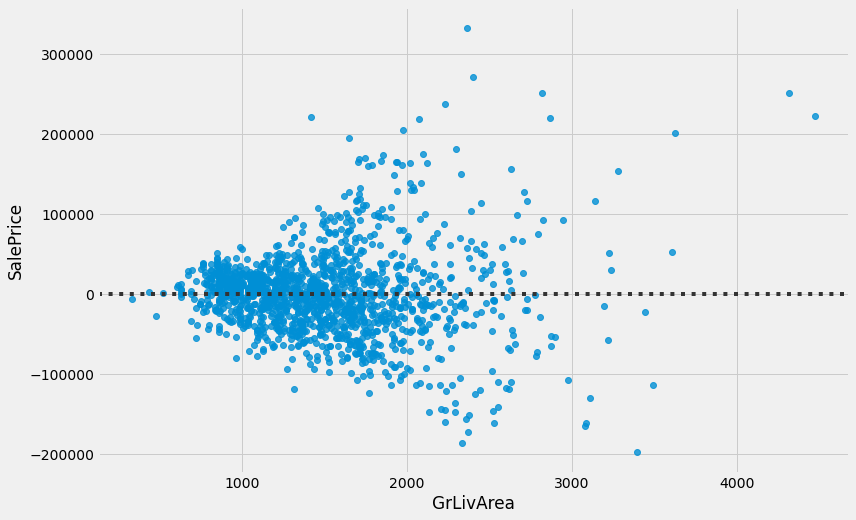

In [45]:
plt.subplots(figsize = (12,8))
sns.residplot(df_train.GrLivArea, df_train.SalePrice);

Le graphique d'erreur montre que lorsque la valeur GrLivArea augmente, la variance augmente également, ce qui correspond aux caractéristiques connues sous le nom d'hétéroscédasticité. 

Ce graphique ci-dessus est un excellent exemple d'homoscédasticité. Comme vous pouvez le voir, la variance résiduelle est la même que la valeur de la variable prédictive augmente. Une façon de corriger cette hétéroscédasticité consiste à utiliser une méthode de transformation telle que la transformation logarithmique ou la transformation box-cox. On le fera plus tard.

Normalité des erreurs:
L'analyse de régression linéaire nécessite que la variable dépendante soit multivariée normalement distribuée. Un histogramme, une boîte à moustaches ou un Q-Q-Plot peut vérifier si la variable cible est normalement distribuée. La qualité du test d'ajustement, par exemple, le test de Kolmogorov-Smirnov peut vérifier la normalité de la variable dépendante. Nous savons déjà que notre variable cible ne suit pas une distribution normale. On ramène les trois graphiques pour montrer la variable cible.

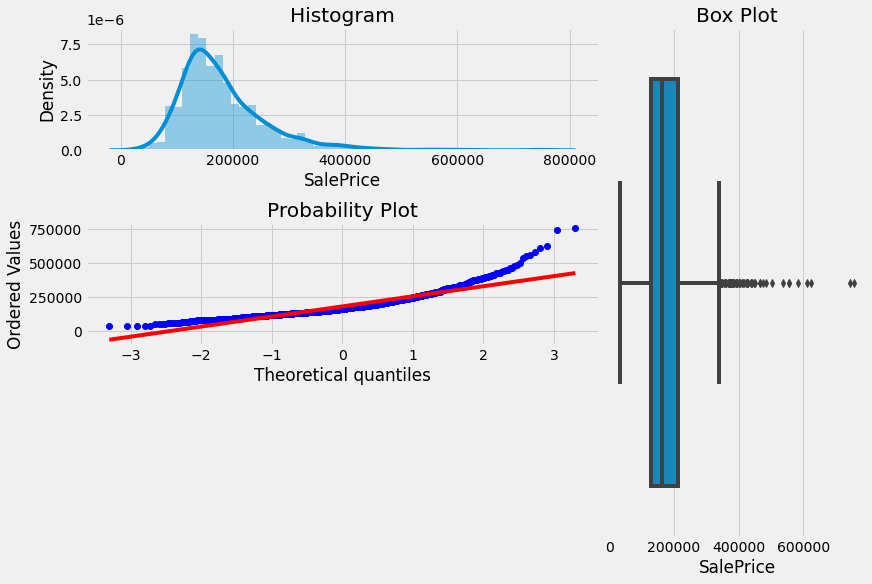

In [46]:
plotting_3_chart(df_train, 'SalePrice')

Maintenant , on va s'assurer que la variable cible suit une distribution normale.

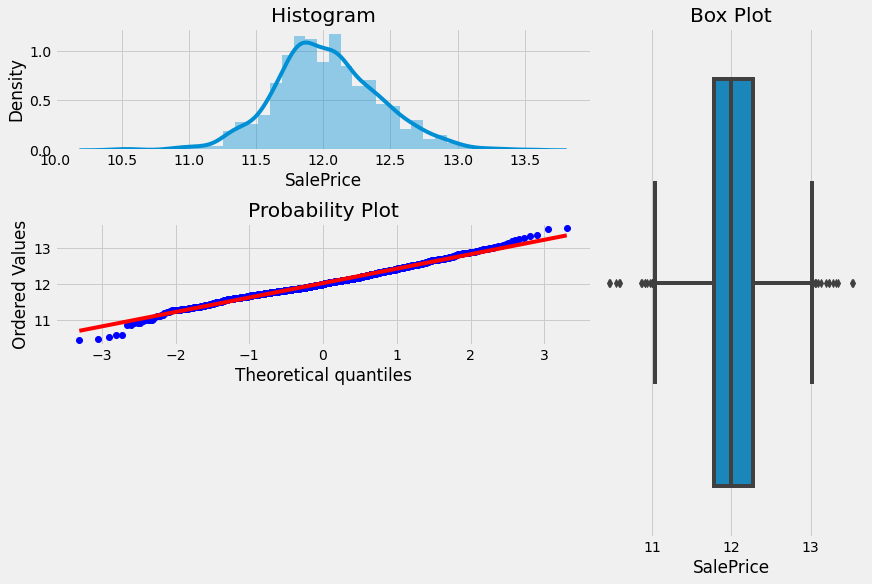

In [47]:
# transformation de la variable cioble
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])


plotting_3_chart(df_train, 'SalePrice')

La transformation supprime la normalité des erreurs, ce qui résout la plupart des autres erreurs. 
Comparons de l'état pré-transformé et post-transformé des plots résiduels.

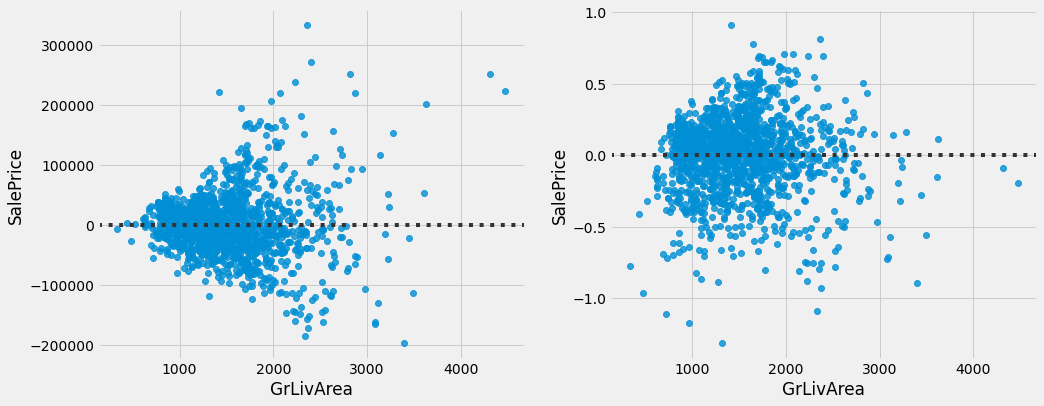

In [48]:
#Personnalisation des grids pour les deux plots
fig, (ax1, ax2) = plt.subplots(figsize = (15,6), 
                               ncols=2, 
                               sharey = False, 
                               sharex=False
                              )
# le premier scatter plot 
sns.residplot(x = df_train2.GrLivArea, y = df_train2.SalePrice, ax = ax1)
# Le deuxième scatter plot pour GrLivArea et SalePrice 
sns.residplot(x = df_train.GrLivArea, y = df_train.SalePrice, ax = ax2);

On remarque que le graphique post-transformé à droite présente une homocédasticité. En effet, presque une quantité égale de variance sur les lignes zéro. 

Pas ou peu de multicolinéarité :
Heatmap est un excellent moyen d'identifier s'il y a ou non multicolinéarité. La meilleure façon de résoudre la multicolinéarité est d'utiliser des méthodes de régularisation comme Ridge ou Lasso.

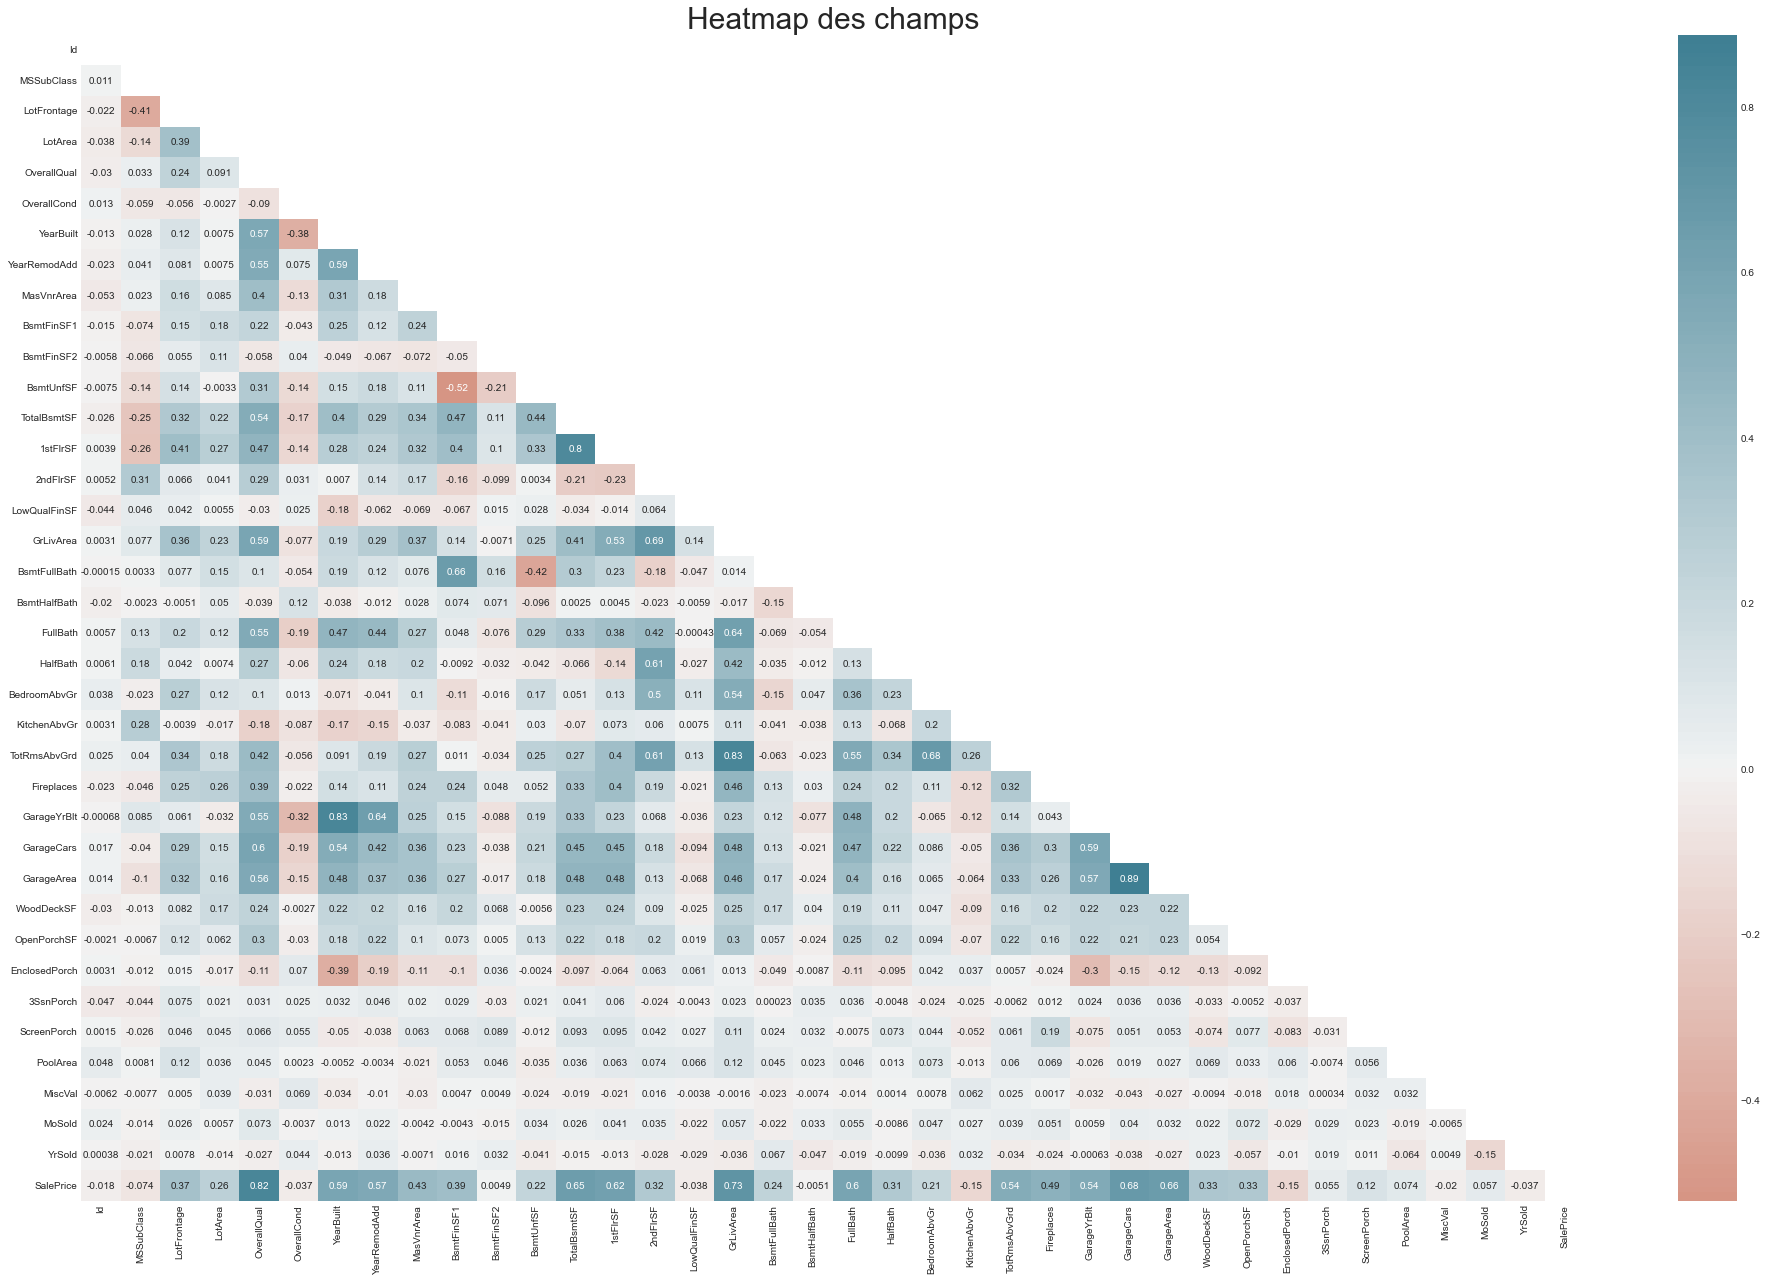

In [49]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );

plt.title("Heatmap des champs", fontsize = 30);

## Observation :
On voit que la multicolinéarité existe toujours dans des champs divers 

Il existe une :
* Corrélation de 83 % entre **GarageYrBlt** et **YearBuilt**.
* Corrélation de 89 % entre **GarageCars** et **GarageArea**.
* Corrélation de 83 % entre **TotRmsAbvGrd** et **GrLivArea**.
* De même, de nombreuses autres fonctionnalités telles que **BsmtUnfSF**, **FullBath** ont une bonne corrélation avec d'autres fonctionnalités indépendantes.
